# Traditional Learning With Allaart's Classifier & Data Set
### For research paper: Active Learning To Reduce Human Labeling For Automatic Psychological TextClassification
### Author: Jahson O'Dwyer Wha Binda

# Import DataSet

In [2]:
import csv

with open('FINAL_CSV.csv') as data:
    reader = csv.DictReader(data)

# Data
    story = []
    labels = ["vulnerable", "angry", "impulsive", "happy", "detached", "punishing", "healthy"]
# Labels
    is_vulnerable = []
    is_angry = []
    is_impulsive = []
    is_happy = []
    is_detached = []
    is_punishing = []
    is_healthy = []
    
#  Load DATA/Labels
    for row in reader:
        story.append(row['Text'])
        is_vulnerable.append(row['is_vulnerable'] == 'TRUE')
        is_angry.append(row['is_angry'] == 'TRUE')
        is_impulsive.append(row['is_impulsive'] == 'TRUE')
        is_happy.append(row['is_happy'] == 'TRUE')
        is_detached.append(row['is_detached'] == 'TRUE')
        is_punishing.append(row['is_punishing'] == 'TRUE')
        is_healthy.append(row['is_healthy'] == 'TRUE')

# Normal SVN PreProccessing

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay

unique, counts = np.unique(is_happy, return_counts=True)
print(dict(zip(unique, counts)))


randomSeed = 37
trainSize = 0.8

#Combine All Labels (Schema)
schema = np.vstack((is_vulnerable, is_angry, is_impulsive, is_happy, is_detached, is_punishing, is_healthy)).T

# Split into training and testing data
story_train, story_test, schema_train, schema_test = train_test_split(story, schema, train_size=trainSize, random_state=randomSeed)

unique, counts = np.unique(schema_test[:,3], return_counts=True)
print(dict(zip(unique, counts)))

print(len(schema_train))

{False: 367, True: 1008}
{False: 69, True: 206}
1100


In [4]:
#Natural Language PreProcessing
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


#Tokenization
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(story_train)
word_index = tokenizer.word_index

sequences_train = tokenizer.texts_to_sequences(story_train)
story_padded_train = pad_sequences(sequences_train, padding="post", maxlen=617)

sequences_test = tokenizer.texts_to_sequences(story_test)
story_padded_test = pad_sequences(sequences_test, padding="post", maxlen=617)

(1100, 7)
36.73%


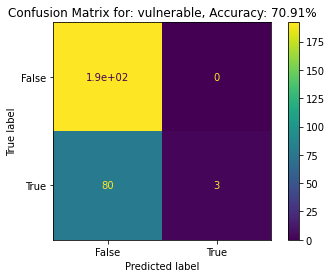

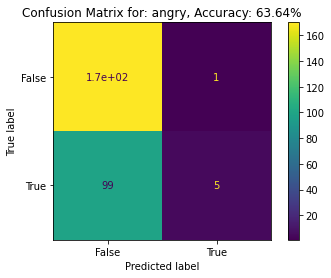

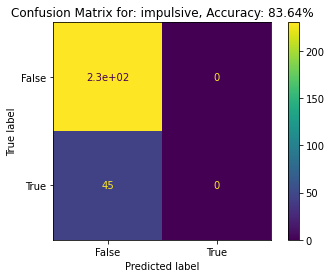

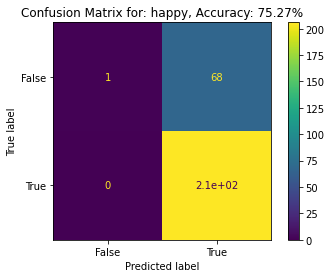

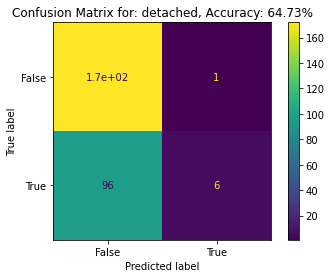

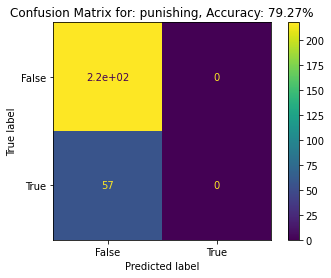

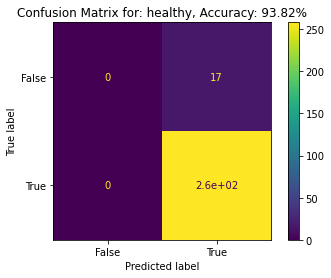

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV

# Create the SVM
svm = SVC(random_state=randomSeed, probability=True)


# Make it an Multilabel classifier
multilabel_classifier = MultiOutputClassifier(svm, n_jobs=-1)

print(np.shape(schema_train))
# Fit the data to the Multilabel classifier
multilabel_classifier = multilabel_classifier.fit(story_padded_train, schema_train)

# Get predictions for test data
schema_test_pred = multilabel_classifier.predict(story_padded_test)
print("{:.2%}".format(accuracy_score(y_true=schema_test, y_pred=schema_test_pred)))

# Generate multiclass confusion matrices
matrices = multilabel_confusion_matrix(y_true=schema_test, y_pred=schema_test_pred)
# Plotting matrices: code
i = 1
for mat in matrices:
    cmd = ConfusionMatrixDisplay(mat, display_labels=np.unique(schema_test)).plot()
    plt.title('Confusion Matrix for: ' + labels[i-1] + ", Accuracy: " + "{:.2%}".format(accuracy_score(y_true=schema_test[:,i-1], y_pred=schema_test_pred[:,i-1])))
    plt.show()
    i += 1